In [1]:
# Clear the run and run this to analyze backtest data

import os
os.chdir(r'C:\algo2')
# coding=utf-8
import datetime as dt
import collections
import matplotlib.pyplot as plt
import numpy as np
import pytz
import datetime
from Utils import Utils
from IBridgePy.IbridgepyTools import symbol
from configuration import test_me
from data_provider_factory.data_loading_plan import HistIngestionPlan, Plan
import pandas as pd

import csv
import datetime
from dateutil import tz
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
import numpy as np
import os
import pandas as pd
import pytz
import sys
import time

from trader_factory import build_active_IBridgePy_plus
from IBridgePy.IbridgepyTools import symbol

from Utils import Algos
from Utils import EnterExits
from Utils import IndicatorCalculations
from Utils import Orders
from Utils import Plotters
from Utils import Utils
from UnitTests import testutils


# sim = build_active_IBridgePy_plus('DU2628075') # Build an active trader to get connected to Interactive Brokers 


In [2]:
# dailyPriceData = sim.request_historical_data(symbol('SPY'), '1 min', '10 D')
# dailyPriceData.to_csv(r"Log\Daily_Price_Data_"+str(datetime.date.today())+".csv")

logData, priceData = Utils.loadAndCleanData()



C:\Users\Lane Capital\anaconda3_rev1\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


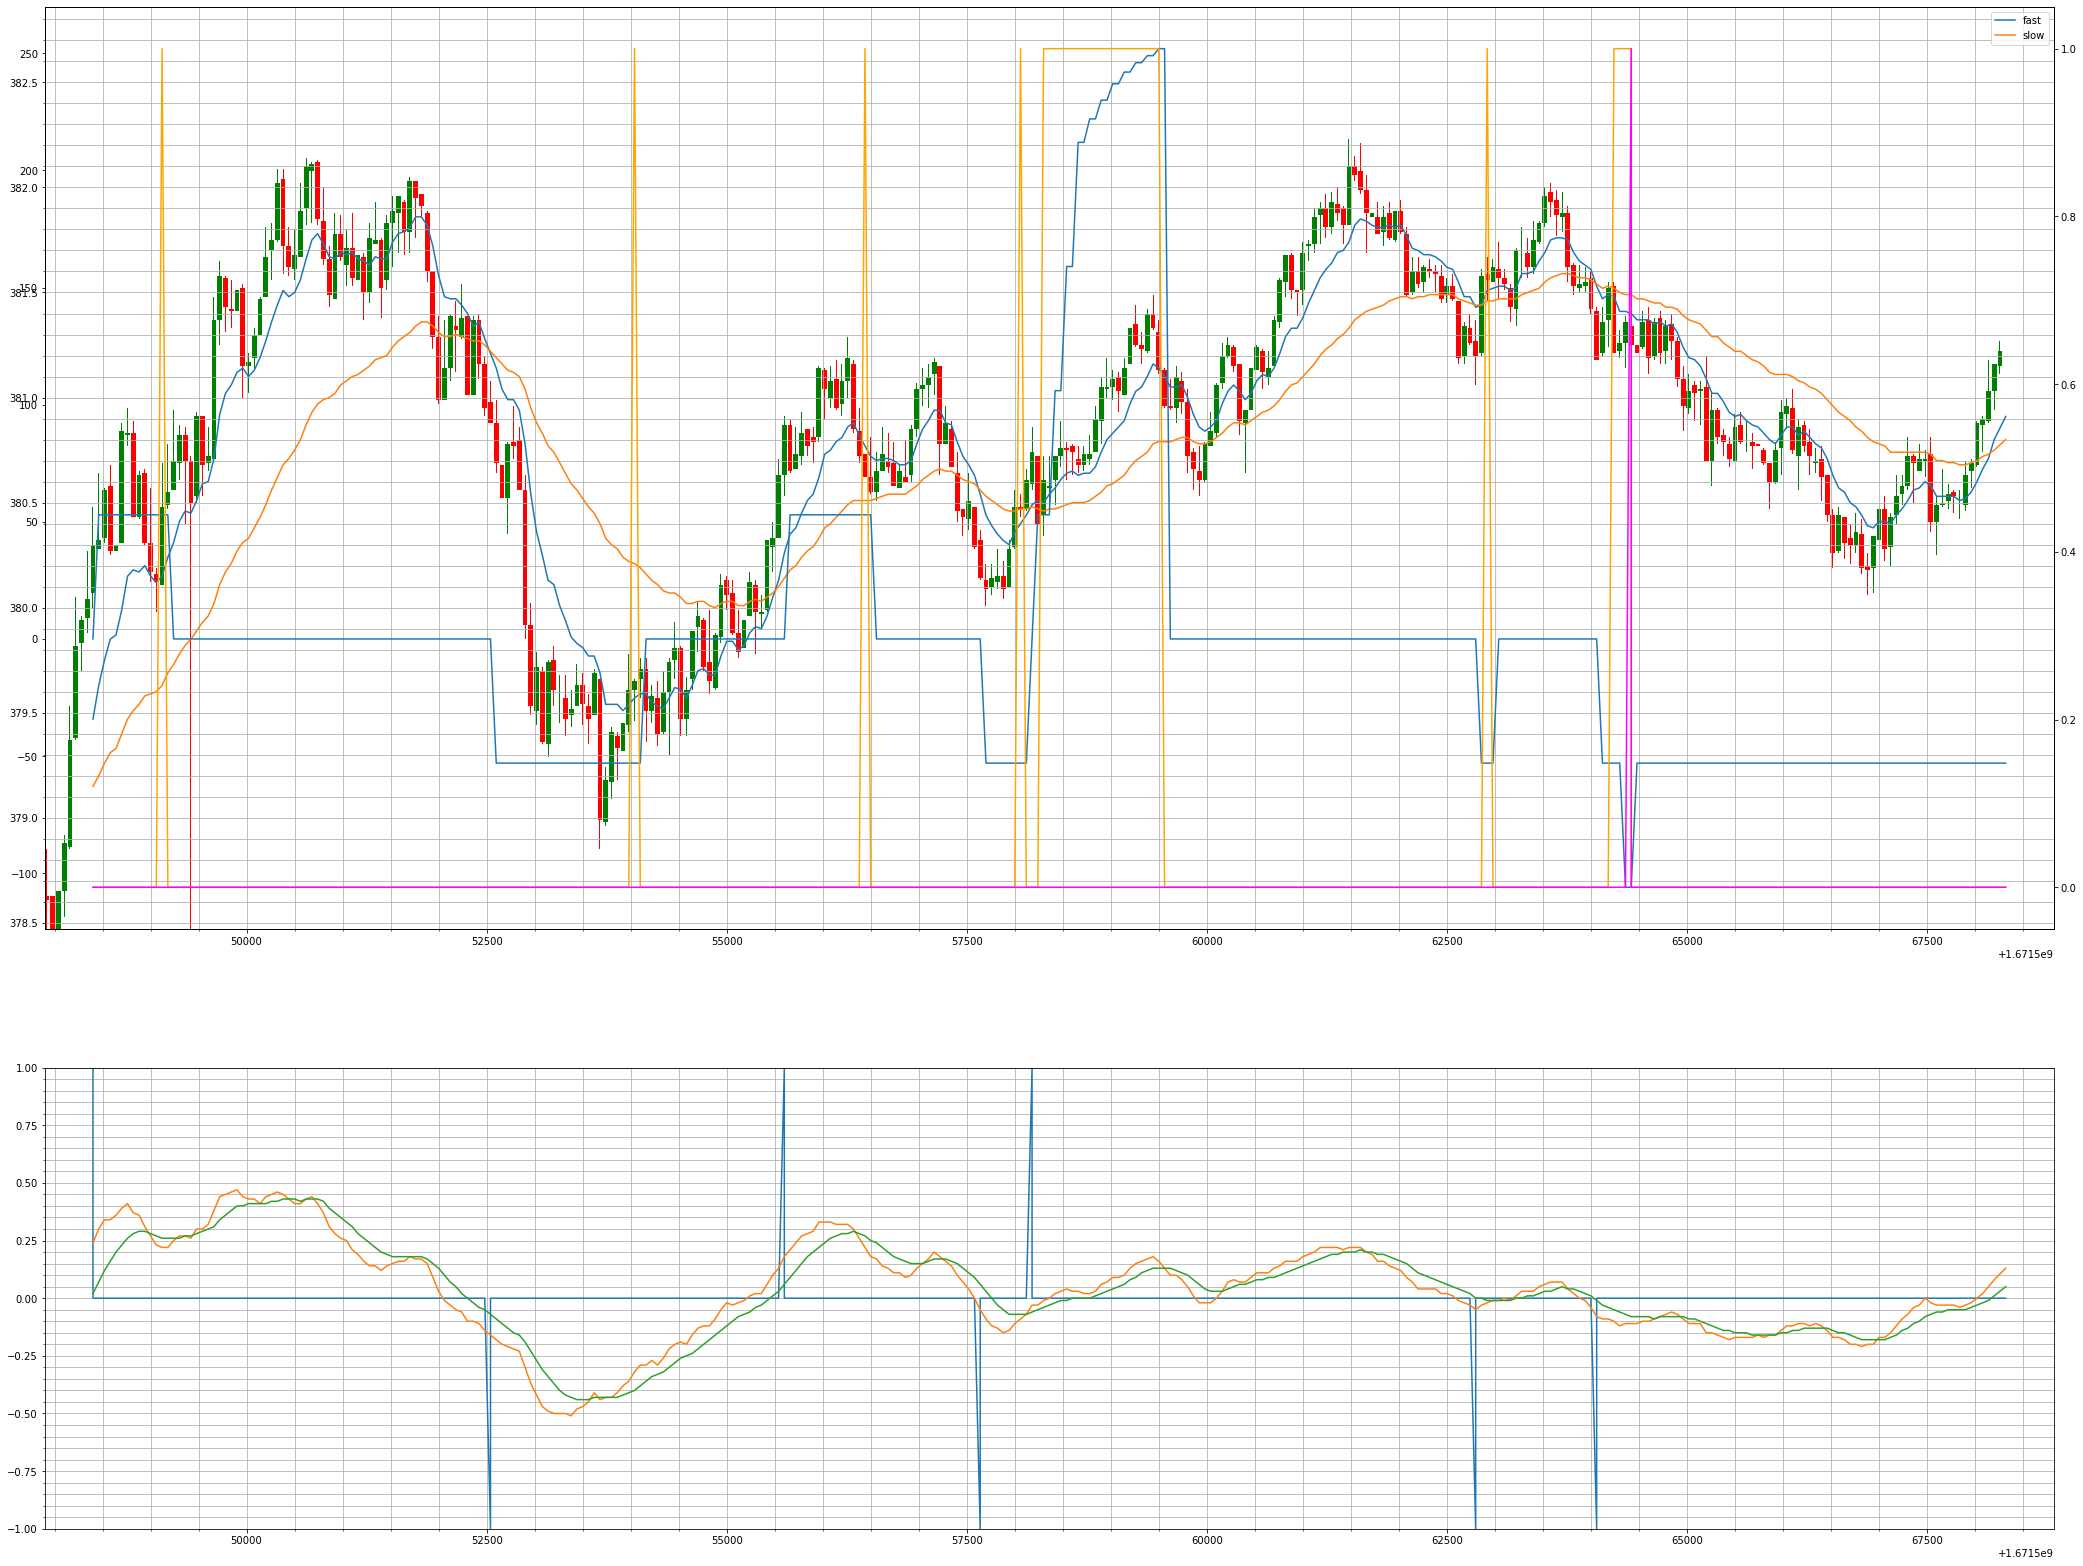

In [3]:
 #create figure
fig, (ax,ax1) = plt.subplots(2,figsize=(36,28),gridspec_kw={'height_ratios': [2, 1]})

#define width of candlestick elements
width = 50
width2 = 10

# #define up and down priceData
up = priceData[priceData.close>=priceData.open]
down = priceData[priceData.close<priceData.open]
log = logData.copy()

#define colors to use
col1 = 'green'
col2 = 'red'

ax.plot(log.time,log.fast)
ax.plot(log.time,log.slow)

outArray=Plotters.plotEntryStatus(log)
ax1.plot(log.time,outArray)

ax1.plot(log.time,log.macd)
ax1.plot(log.time,log.signalLine)

ax.legend(["fast", "slow"])
#plot up priceData
ax.bar(up.time,up.close-up.open,width,bottom=up.open,color=col1)
ax.bar(up.time,up.high-up.close,width2,bottom=up.close,color=col1)
ax.bar(up.time,up.low-up.open,width2,bottom=up.open,color=col1)

# #plot down priceData
ax.bar(down.time,down.close-down.open,width,bottom=down.open,color=col2)
ax.bar(down.time,down.high-down.open,width2,bottom=down.open,color=col2)
ax.bar(down.time,down.low-down.close,width2,bottom=down.close,color=col2)

ax2=ax.twinx()
ax3=ax2.twinx()
ax2.plot(log.time,log.positionSize)
ax3.plot(log.time,log.exitFlag,color='orange')
ax3.plot(log.time,log.saleFlag,color='magenta')


N=0
minLim = (log.time.max()-log.time.min())*N+log.time.min()
maxLim = log.time.max()-(log.time.max()-log.time.min())*N

x=(minLim-500,maxLim+500)
# x=(1.668E9+781750,1.668E9+800000)
ax.set_xlim(x)
ax1.set_xlim(x)
ax.set_ylim((np.min(log.fast.values)-1,np.max(log.fast.values)+1))
ax1.set_ylim((-1,1))

ax.grid(which='both')
ax1.grid(which='both')

ax.minorticks_on()
ax1.minorticks_on()

fig.savefig(r'Log\backtestPlot.png')

In [ ]:
pnl = np.round(logData.portfolioValue.iloc[-1]-logData.portfolioValue.iloc[0],2)
print(pnl) 

In [ ]:
datetime.datetime.fromtimestamp(log.time.values[0])

In [ ]:
log.midPrice

In [ ]:
def getTLineSlope(data, tLine, tSlope):
    """ This function manages the deque for the tLine and tLineSlope"""
    
    tLine.append(data) # append tLine
    if len(tLine)>2: # if tLine is larger than two elements, take the slope and drop the oldest element
        tSlope.append(tLine[1]-tLine[0])
        tLine.popleft()
    if len(tSlope)>3: # if the tslope is larger than 3 elements, drop the oldest element
        tSlope.popleft()
    return tLine, tSlope

In [ ]:
def getWeightedAverage(inputData, n: int = 3, weights: list = [0.1, 0.3, 0.6]):
    """This function takes an N element vector and a weight vector and applies a weighted average of the vector"""
    
    assert len(weights)==n, "N must be length of weights vector"
    assert np.sum(weights)==1, "Weights must sum to 1"
    return np.sum(np.array([(inputData[i]*weights[i]) for i in range(n)]))
    

In [ ]:
def test_getWeightedAverage():
    
    vector = np.array([[5, 10, 15],
              [0,0,5],
              [-10,10,2]])
    correctVals = np.array([12.5, 3.0, 3.2])
    calcVals = []
    for i in range(len(vector)):
        calcVals.append(getWeightedAverage(vector[i]))

    assert np.all([calcVals[i]==correctVals[i] for i in range(len(calcVals))]), "Answers do not match"